# Obtener el 'posterior' para los datos de las supernovas evaluando una funcion de probabilidad (prior) P(A) para distintos valores de Omega de materia y H0.

### Usamos el algoritmo del ejercicio de Likelihood.

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
from scipy.optimize import minimize
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


In [10]:
data = np.loadtxt('jla_mub.txt').T
cov_mat = np.loadtxt('jla_mub_covmatrix.dat').T
cov_mat = np.reshape(cov_mat,(-1,31))
invcov = np.linalg.inv(cov_mat)
H0 = 100
c = 3e5

In [11]:
def eta(a, Om):
    s3 = (1-Om)/Om 
    s2 = s3**(2/3)
    s = s3**(1/3)
    return 2*np.sqrt(s3+1)*((1/(a**4))-0.1540*s/(a**3)+0.4304*s2/(a**2)+0.19097*s3/a+(0.06694*s**4))**(-1/8)

def DL(z, H0, Om):
    return (c/H0)*(1+z)*(eta(1, Om)-eta(1/(1+z),Om))

def mu(z,H0,Om):
    return 25-5*np.log10(H0/100)+5*np.log10(DL(z, H0, Om))


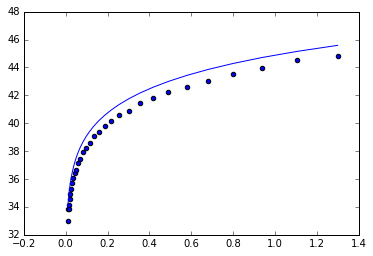

In [12]:
# Graficamos un conjuntp de datos
plot(data[0],mu(data[0],70,0.3))
scatter(data[0], data[1])

### Definimos el Likelihood y la funcion 'prior' (posterior)

def lnlh(theta):
    modelo=mu(data[0], theta[0],theta[1])
    diferencia = data[1]-modelo
    u=0
    u = np.dot(diferencia, invcov)
    u = np.dot(u,diferencia.T)
    u = -0.5 * np.sum(u)
    return u


def priors(pars, plist):
    Omega_m, h = pars
    if plist[0]<Omega_m<plist[1] and plist[2]<h<plist[3]:
        return 0.0
    return -np.inf


def log_post(pars,z,data,cov,plist):
    prior = priors(pars,plist)
    if not np.isfinite(prior):
        return -np.inf
    return prior + lnlh(pars,z,data,cov)
    
    
def Markov(theta1, thetap):
    p1 = lnlh(theta1)
    pp = lnlh(thetap)
    if(pp>p1):
        return thetap
    else:
        w = np.random.rand()
        if(pp-p1>np.log(w)):
            return thetap
        else:
            return theta1
    return

### Evaluamos para 8 cadenas

In [174]:
Nmuestras = 1000
sigma1 = 1
sigma2 = 0.1

Ncadenas = 8
thetas = [50,0.3]
cadenas = []

for j in range(Ncadenas):
    thetas = np.array([np.random.normal(np.random.uniform(50, 100), sigma1), np.random.normal(thetas[1], sigma2)])
    for i in range(Nmuestras):
        if i==0:
            cadena = thetas
        else:
            thetat = np.array([np.random.normal(thetas[0], sigma1), np.random.normal(thetas[1], sigma2)])
            thetanuevo = Markov(thetas, thetat)
            cadena = np.vstack((cadena, thetanuevo))
            thetas = thetanuevo
    if j==0:
        cadenas = cadena
    else:
        cadenas = np.vstack((cadenas, cadena))

/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


In [178]:
x1 = cadenas[0:Nmuestras,0]
y1 = cadenas[0:Nmuestras,1]
x2 = cadenas[Nmuestras+1:Nmuestras*2,0]
y2 = cadenas[Nmuestras+1:Nmuestras*2,1]
x3 = cadenas[2*Nmuestras+1:Nmuestras*3,0]
y3 = cadenas[2*Nmuestras+1:Nmuestras*3,1]
x4 = cadenas[3*Nmuestras+1:Nmuestras*4,0]
y4 = cadenas[3*Nmuestras+1:Nmuestras*4,1]
x5 = cadenas[4*Nmuestras+1:Nmuestras*5,0]
y5 = cadenas[4*Nmuestras+1:Nmuestras*5,1]
x6 = cadenas[5*Nmuestras+1:Nmuestras*6,0]
y6 = cadenas[5*Nmuestras+1:Nmuestras*6,1]
x7 = cadenas[6*Nmuestras+1:Nmuestras*7,0]
y7 = cadenas[6*Nmuestras+1:Nmuestras*7,1]
x8 = cadenas[7*Nmuestras+1:Nmuestras*8,0]
y8 = cadenas[7*Nmuestras+1:Nmuestras*8,1]

### Graficamos las cadenas generadas

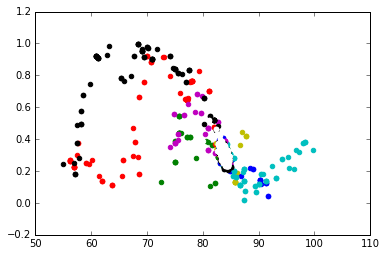

In [180]:
plt.scatter(x1, y1, color = 'g')
plt.scatter(x2, y2, color = 'r')
plt.scatter(x3, y3, color = 'y')
plt.scatter(x4, y4, color = 'b')
plt.scatter(x5, y5, color = 'c')
plt.scatter(x6, y6, color = 'm')
plt.scatter(x7, y7, color = 'k')
plt.scatter(x8, y8, color = 'w')

(0.15, 0.5)

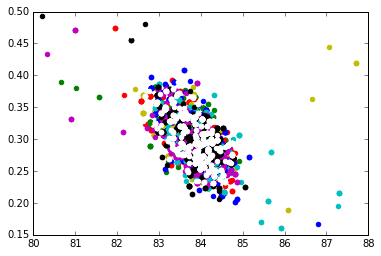

In [184]:
plt.scatter(x1, y1, color = 'g')
plt.scatter(x2, y2, color = 'r')
plt.scatter(x3, y3, color = 'y')
plt.scatter(x4, y4, color = 'b')
plt.scatter(x5, y5, color = 'c')
plt.scatter(x6, y6, color = 'm')
plt.scatter(x7, y7, color = 'k')
plt.scatter(x8, y8, color = 'w')
plt.xlim(80, 88)
plt.ylim(0.15, 0.5)